# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [34]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path


resources = Path("resources")
output_path = Path("analysis")
city_data_df = pd.read_csv(resources / "city_data.csv")
ride_data_df = pd.read_csv(resources / "ride_data.csv")
# Merge Dataframes
pyber_data_df = city_data_df.merge(
    ride_data_df, on=["city", "city"]).set_index("city")
city_data_df = city_data_df.set_index("city")
pyber_data_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


## Deliverable 1: Get a Summary DataFrame 

In [40]:
# 1. Get the total rides for each city type
# 2. Get the total drivers for each city type
# 3. Get the total amount of fares for each city type
# 4. Get the average fare per ride for each city type. 
# 5. Get the average fare per driver for each city type. 
total_fares = pyber_data_df.groupby(["type"])["fare"].sum()
total_rides = pyber_data_df.groupby(["type"])["ride_id"].count()
total_drivers = city_data_df.groupby(["type"])["driver_count"].sum()
fare_per_ride = (total_fares / total_rides)
fare_per_driver = (total_fares / total_drivers)
fare_per_ride, fare_per_driver

(type
 Rural       34.623440
 Suburban    30.970128
 Urban       24.525772
 dtype: float64,
 type
 Rural       55.486282
 Suburban    39.502714
 Urban       16.571468
 dtype: float64)

In [41]:
# 6. Create a PyBer summary DataFrame. 
# 7. Cleaning up the DataFrame. Delete the index name
# 8. Format the columns.
format_comma = lambda x: f"{x:,}"
format_currency = lambda x: f"${x:,.2f}"
fares_summary_df = pd.DataFrame(
    {
        "Total Rides":total_rides.map(format_comma),
        "Total Drivers":total_drivers.map(format_comma),
        "Total Fares":total_fares.map(format_currency),
        "Average Fare per Ride":fare_per_ride.map(format_currency),
        "Average Fare per Driver":fare_per_driver.map(format_currency),
    }
)
fares_summary_df.index.name = ""
fares_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [42]:
# 1. Read the merged DataFrame
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dates = pyber_data_df.groupby(["type", "date"])["fare"].sum().reset_index()
dates_pivot = dates.pivot(index="date", columns ="type")
dates_range = dates_pivot.loc[
    (dates_pivot.index >= "2019-01-01") &
    (dates_pivot.index <= "2019-04-28")
].reset_index()
dates_range.head()

date  fare                
type                      Rural Suburban  Urban
0     2019-01-01 00:08:16   NaN      NaN  37.91
1     2019-01-01 00:46:46   NaN    47.74    NaN
2     2019-01-01 02:07:24   NaN    24.07    NaN
3     2019-01-01 03:46:50   NaN      NaN   7.57
4     2019-01-01 05:23:21   NaN      NaN  10.75

In [43]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# 7. Check that the datatype for the index is datetime using df.info()
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
dates_range["date"] = pd.to_datetime(dates_range["date"])
fares_per_week = dates_range.resample("W", on="date").sum()
fares_per_week.head()

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

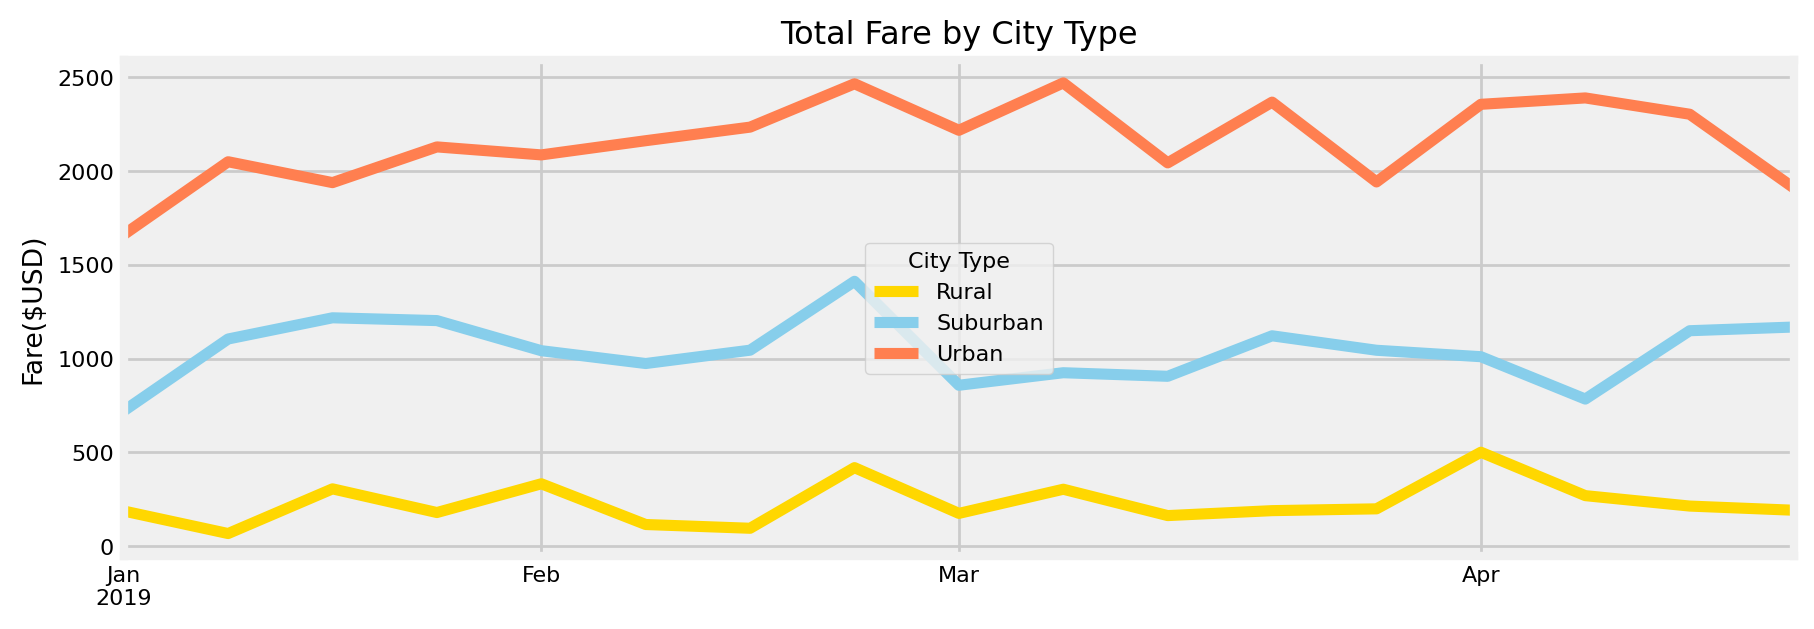

In [65]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Use the graph style fivethirtyeight.
from matplotlib.colors import ListedColormap


style.use('fivethirtyeight')
dpi = 200
fontsize = 8
colors = ["gold", "skyblue", "coral"]
colormap = ListedColormap(colors, name="PyBer")
mpl.rcParams["font.size"] = fontsize
# Create fig
fig = plt.figure(
    figsize=(1920/dpi, 612/dpi), 
    facecolor="white",
    dpi=dpi)
# Create ax
ax = fig.add_subplot(111)
ax = fares_per_week.plot(
    ax = ax,
    title="Total Fare by City Type",
    ylabel="Fare($USD)",
    xlabel="",
    fontsize=fontsize,
    colormap = colormap
)
legend = ax.legend(
    fontsize=fontsize,
    labels = ["Rural", "Suburban", "Urban"],
    mode="Expanded", 
    scatterpoints=1, 
    loc="center", 
    title="City Type"
)
for lg in legend.legendHandles:
    lg._sizes = [75]
legend.get_title().set_fontsize(fontsize)
fig.savefig(
    output_path / "PyBer_fare_summary.png", 
    dpi=dpi,
    bbox_inches="tight")
